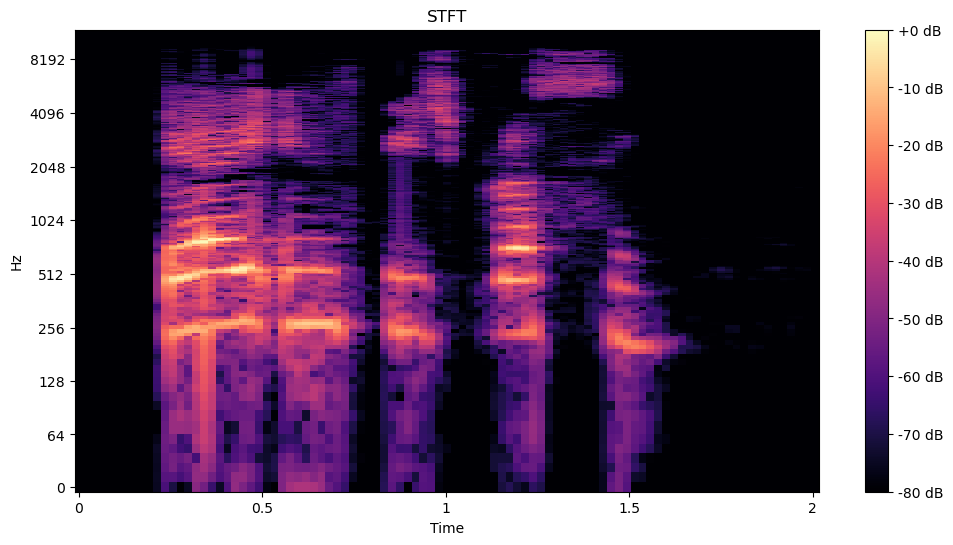

C:\Users\Mishal_25\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


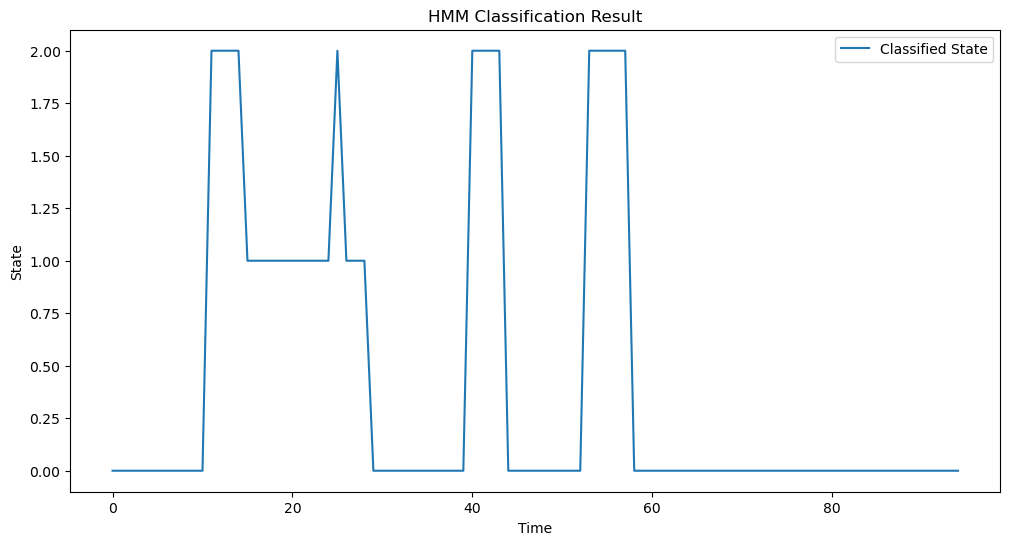

HMM Model Parameters:
Transition Matrix:
[[0.95522388 0.         0.04477612]
 [0.07692308 0.84615385 0.07692308]
 [0.14285714 0.14285714 0.71428571]]
Means:
[[6.73204057e-02 5.31687662e-02 4.80696176e-02 ... 1.58749374e-04
  1.56434687e-04 1.50308113e-04]
 [3.62593872e-01 3.88960531e-01 3.53963675e-01 ... 1.57102194e-04
  1.58281303e-04 1.75032192e-04]
 [4.84923933e-02 9.71213967e-02 1.69371973e-01 ... 1.31120248e-04
  1.43422047e-04 1.61412323e-04]]
Covariances:
[[[0.041904   0.         0.         ... 0.         0.         0.        ]
  [0.         0.01762803 0.         ... 0.         0.         0.        ]
  [0.         0.         0.00966395 ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.00014707 0.         0.        ]
  [0.         0.         0.         ... 0.         0.00014707 0.        ]
  [0.         0.         0.         ... 0.         0.         0.00014708]]

 [[0.11053713 0.         0.         ... 0.         0.         0.        ]
  [0. 

In [4]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

def load_audio(file_path):
    ydata, sr = librosa.load(file_path, sr=None)
    return ydata, sr

def stft_features(ydata, sr):
    stft = np.abs(librosa.stft(ydata))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

def main():
    audio_file_path = "SP.wav"
    
    y, sr = load_audio(audio_file_path)
    
    # Extract STFT features
    stft = stft_features(y, sr)
    
    # Plot STFT
    plot_stft(stft, sr)
    
    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement
    
    # Classify signal using trained HMM
    labels = classify_signal(model, stft)
    
    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)
    
if __name__ == "__main__":
    main()
